# Libs, data importing

In [1]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



/home/jerzy/.conda/envs/indml/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/home/jerzy/.conda/envs/indml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/jerzy/.conda/envs/indml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_train = pd.read_csv('/home/jerzy/Documents/IndustrialML/data/train_preprocessed.csv')
data_train.drop('Unnamed: 0', axis=1, inplace=True)
data_train

,point,lon,lat,time,timestamp,num_posts
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,30.116020,59.835705,2019-11-22 11:00:00,1574420400,1
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,30.116020,59.835705,2019-11-22 12:00:00,1574424000,1
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,30.116020,59.835705,2019-11-23 13:00:00,1574514000,1
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,30.116020,59.835705,2019-11-25 16:00:00,1574697600,1
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,30.116020,59.835705,2019-11-27 10:00:00,1574848800,1
...,...,...,...,...,...,...
3625651,0101000020E6100000FF9D4C0EC3853E4094782B2D0DF3...,30.522508,59.898840,2019-12-06 04:00:00,3151209600,2
3625652,0101000020E6100000FF9D4C0EC3853E4094782B2D0DF3...,30.522508,59.898840,2019-12-23 08:00:00,1577088000,1
3625653,0101000020E6100000FF9D4C0EC3853E40ABD94A1972EF...,30.522508,59.870670,2019-06-10 09:00:00,1560157200,1
3625654,0101000020E6100000FF9D4C0EC3853E40ABD94A1972EF...,30.522508,59.870670,2019-10-06 14:00:00,1570370400,1


In [3]:
data_test = pd.read_csv('/home/jerzy/Documents/IndustrialML/data/test.csv')
data_test

,hour,lat,lon,point,sum,error
0,1582711200,59.934863,30.331616,0101000020E61000009BAC04C2E4543E40DB251193A9F7...,7,0.370265
1,1581937200,59.940488,30.329370,0101000020E6100000DBC1F19351543E4006FC5DE561F8...,6,0.754735
2,1581523200,59.905597,30.297929,0101000020E61000006AEBE80E454C3E407F614299EAF3...,5,3.754735
3,1581512400,59.921359,30.356319,0101000020E6100000CFC2D4BC375B3E401FBF4913EFF5...,16,4.088069
4,1581771600,59.939363,30.315895,0101000020E61000006141807FDE503E40A554BF083DF8...,10,2.088069
...,...,...,...,...,...,...
695,1582059600,59.926986,30.331616,0101000020E61000009BAC04C2E4543E4070B5CC78A7F6...,6,0.754735
696,1582038000,59.925860,30.295683,0101000020E6100000AB00D6E0B14B3E406379569882F6...,15,1.215399
697,1581926400,59.937113,30.282208,0101000020E6100000328064CC3E483E400C288C4EF3F7...,20,18.754735
698,1582099200,59.933737,30.322632,0101000020E61000009E01B90998523E407AB3D8B484F7...,8,2.754735


In [4]:
data_val = pd.read_csv('/home/jerzy/Documents/IndustrialML/data/valid.csv')
data_val

,hour,lat,lon,point,sum,error
0,1582448400,59.926986,30.318141,0101000020E6100000202C93AD71513E4070B5CC78A7F6...,5,0.421402
1,1582225200,59.924735,30.241784,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,14,0.310291
2,1581260400,60.002300,30.295683,0101000020E6100000AB00D6E0B14B3E40CB88A75E4B00...,5,3.754735
3,1581958800,59.935988,30.324878,0101000020E61000005DECCB372B533E40E4A1F770CEF7...,7,0.504735
4,1582779600,59.933737,30.306912,0101000020E6100000669634C7914E3E407AB3D8B484F7...,14,1.554735
...,...,...,...,...,...,...
704,1580659200,59.905597,30.297929,0101000020E61000006AEBE80E454C3E407F614299EAF3...,7,2.254735
705,1581048000,59.950610,30.315895,0101000020E61000006141807FDE503E402B348A98ADF9...,8,6.754735
706,1581656400,59.933737,30.309158,0101000020E6100000268147F5244F3E407AB3D8B484F7...,6,4.754735
707,1580724000,59.931487,30.358565,0101000020E61000008EADE7EACA5B3E40CAE971F73AF7...,8,1.421402


# Baseline solution

## Predict mean for each point

For each centroid of the dataset we calculated mean value and rounded. We predicted this value for each timestamp inside of each centroid.

Turns out that it is enough to accoplish the task:

Validation dataset average error: 1.24

Test dataset average error: 1.18

In [5]:
data_unique_points = data_train['point'].unique()
test_unique_points = data_test['point'].unique()
valid_unique_points = data_val['point'].unique()

In [6]:
df = pd.DataFrame({'point': data_train.groupby('point')['num_posts'].mean().index, 'num_posts_mean': data_train.groupby('point')['num_posts'].mean().values})
df

,point,num_posts_mean
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1.000000
1,0101000020E610000002BF48199F3F3E400A41C338F1F6...,1.000000
2,0101000020E610000002BF48199F3F3E400A721DB144FC...,1.313953
3,0101000020E610000002BF48199F3F3E400B9A5B330603...,1.051724
4,0101000020E610000002BF48199F3F3E400C44B6B2C5F3...,1.014085
...,...,...
7019,0101000020E6100000FF9D4C0EC3853E406E4CE6811AEA...,1.102273
7020,0101000020E6100000FF9D4C0EC3853E408481D0E8E0EF...,1.000000
7021,0101000020E6100000FF9D4C0EC3853E4094782B2D0DF3...,1.100000
7022,0101000020E6100000FF9D4C0EC3853E40ABD94A1972EF...,1.000000


In [7]:
# let's find the mean values of num_posts for each point

df_val_mean = pd.Series(df[df['point'] == el]['num_posts_mean'].values for el in data_val['point']).str[0]
assert len(df_val_mean.unique()) == len(valid_unique_points)

# and then calculate the error
data_val['baseline_error'] = abs(data_val['sum'] - np.round(df_val_mean)) / np.round(df_val_mean)
data_val

,hour,lat,lon,point,sum,error,baseline_error
0,1582448400,59.926986,30.318141,0101000020E6100000202C93AD71513E4070B5CC78A7F6...,5,0.421402,0.666667
1,1582225200,59.924735,30.241784,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,14,0.310291,0.176471
2,1581260400,60.002300,30.295683,0101000020E6100000AB00D6E0B14B3E40CB88A75E4B00...,5,3.754735,0.666667
3,1581958800,59.935988,30.324878,0101000020E61000005DECCB372B533E40E4A1F770CEF7...,7,0.504735,1.333333
4,1582779600,59.933737,30.306912,0101000020E6100000669634C7914E3E407AB3D8B484F7...,14,1.554735,0.333333
...,...,...,...,...,...,...,...
704,1580659200,59.905597,30.297929,0101000020E61000006AEBE80E454C3E407F614299EAF3...,7,2.254735,2.500000
705,1581048000,59.950610,30.315895,0101000020E61000006141807FDE503E402B348A98ADF9...,8,6.754735,0.384615
706,1581656400,59.933737,30.309158,0101000020E6100000268147F5244F3E407AB3D8B484F7...,6,4.754735,1.000000
707,1580724000,59.931487,30.358565,0101000020E61000008EADE7EACA5B3E40CAE971F73AF7...,8,1.421402,1.666667


In [8]:
val_avg_baseline_error = np.mean(data_val['baseline_error'])
assert val_avg_baseline_error < np.mean(data_val['error']) # our baseline is better than your
assert val_avg_baseline_error < 2.6 # and is better than needed
val_avg_baseline_error

1.2395077026100858

In [9]:
df_test_mean = pd.Series(df[df['point'] == el]['num_posts_mean'].values for el in data_test['point']).str[0]
assert len(df_test_mean.unique()) == len(test_unique_points)

data_test['baseline_error'] = abs(data_test['sum'] - np.round(df_test_mean)) / np.round(df_test_mean)
data_test

,hour,lat,lon,point,sum,error,baseline_error
0,1582711200,59.934863,30.331616,0101000020E61000009BAC04C2E4543E40DB251193A9F7...,7,0.370265,0.400000
1,1581937200,59.940488,30.329370,0101000020E6100000DBC1F19351543E4006FC5DE561F8...,6,0.754735,0.000000
2,1581523200,59.905597,30.297929,0101000020E61000006AEBE80E454C3E407F614299EAF3...,5,3.754735,1.500000
3,1581512400,59.921359,30.356319,0101000020E6100000CFC2D4BC375B3E401FBF4913EFF5...,16,4.088069,1.000000
4,1581771600,59.939363,30.315895,0101000020E61000006141807FDE503E40A554BF083DF8...,10,2.088069,1.500000
...,...,...,...,...,...,...,...
695,1582059600,59.926986,30.331616,0101000020E61000009BAC04C2E4543E4070B5CC78A7F6...,6,0.754735,2.000000
696,1582038000,59.925860,30.295683,0101000020E6100000AB00D6E0B14B3E406379569882F6...,15,1.215399,1.500000
697,1581926400,59.937113,30.282208,0101000020E6100000328064CC3E483E400C288C4EF3F7...,20,18.754735,1.857143
698,1582099200,59.933737,30.322632,0101000020E61000009E01B90998523E407AB3D8B484F7...,8,2.754735,0.333333


In [10]:
test_avg_baseline_error = np.mean(data_test['baseline_error'])
assert test_avg_baseline_error < np.mean(data_test['error'])
assert test_avg_baseline_error < 2.6
test_avg_baseline_error

1.1800698202357867

### beta solution
Same concept, works, but slower

In [51]:
# baseline_means_for_val = []
# baseline_mape_val = []

# for i in valid_unique_points:
#     data_point = data_train[data_train['point'] == i]
#     mean = data_point['num_posts'].mean()
#     baseline_means_for_val.append(mean)

# baseline_val = pd.DataFrame({'point': valid_unique_points, 'num_posts_mean': baseline_means_for_val})
# baseline_val

# for row in data_val.iterrows():
#     baseline_mape_val.append(abs(row[1]['sum'] - baseline_val[baseline_val['point'] == row[1]['point']]['num_posts_mean']) / baseline_val[baseline_val['point'] == row[1]['point']]['num_posts_mean'])

# baseline_mape_val = np.array(baseline_mape_val)

# val_with_baseline = data_val.copy()
# val_with_baseline['baseline_mean'] = baseline_mape_val
# val_with_baseline['baseline_mean'].mean()

1.2234462015533245

In [50]:
# baseline_means_for_test = []
# baseline_mape_test = []

# for i in test_unique_points:
#     data_point = data_train[data_train['point'] == i]
#     mean = data_point['num_posts'].mean()
#     baseline_means_for_test.append(mean)

# baseline_test = pd.DataFrame({'point': test_unique_points, 'num_posts_mean': baseline_means_for_test})
# baseline_test

# for row in data_test.iterrows():
#     baseline_mape_test.append(abs(row[1]['sum'] - baseline_test[baseline_test['point'] == row[1]['point']]['num_posts_mean']) / baseline_test[baseline_test['point'] == row[1]['point']]['num_posts_mean'])

# baseline_mape_test = np.array(baseline_mape_test)

# test_with_baseline = data_test.copy()
# test_with_baseline['baseline_mean'] = baseline_mape_test
# test_with_baseline['baseline_mean'].mean()

1.1710401422255892

# Regressions: catboost, lightgbm and xgboost

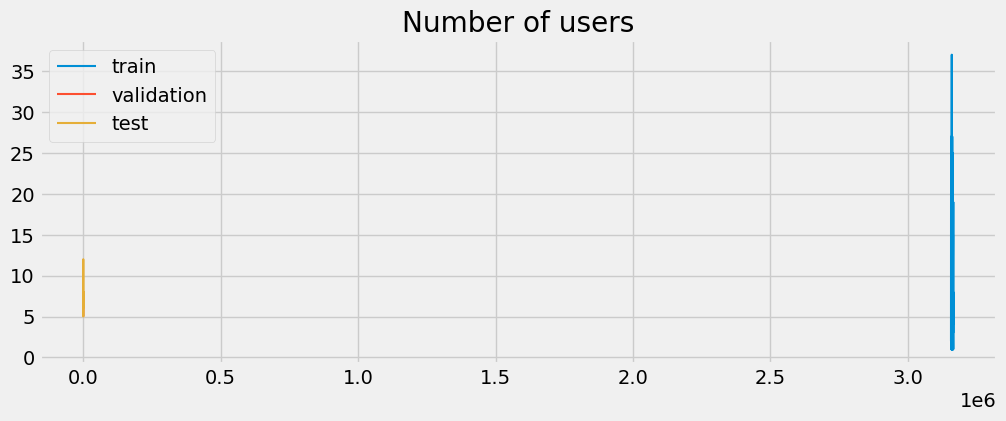

In [34]:
fig, ax = plt.subplots(figsize=(11, 4))

data_train[data_train['point'] == '0101000020E6100000DBC1F19351543E4006FC5DE561F84D40']['num_posts'].plot(ax=ax, label='train')
data_val[data_val['point'] == '0101000020E6100000DBC1F19351543E4006FC5DE561F84D40']['sum'].plot(ax=ax, label='validation')
data_test[data_test['point'] == '0101000020E6100000DBC1F19351543E4006FC5DE561F84D40']['sum'].plot(ax=ax, label='test')
ax.set_title('Number of users')
ax.legend();

## XGBoost

In [73]:
def custom_metric(y_true, y_pred):
    return abs(y_true - y_pred) / y_pred

## CatBoost 

In [ ]:
# 

## Lightgdm